# Loading dataset from PyTorch library

- [Built-in datasets](https://pytorch.org/vision/stable/datasets.html#built-in-datasets)
    - Image classification
        - [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST)
    - Image detection or segmentation
    - Optical Flow
    - Stereo Matching
    - Image pairs
    - Image captioning
    - Video classification
    - Video prediction
- Base classes for custom datasets
- Transforms v2

Fashion-MNIST Dataset.

**Parameters:**
- `root (string)` – Root directory of dataset where FashionMNIST/raw/train-images-idx3-ubyte and FashionMNIST/raw/t10k-images-idx3-ubyte exist.

- `train (bool, optional)` – If True, creates dataset from train-images-idx3-ubyte, otherwise from t10k-images-idx3-ubyte.

- `download (bool, optional)` – If True, downloads the dataset from the internet and puts it in root directory. If dataset is already 
downloaded, it is not downloaded again.
- `transform (callable, optional)` – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.
RandomCrop
- `target_transform (callable, optional)` – A function/transform that takes in the target and transforms it.

**Returns:**
- `(image, target)` where target is index of the target class.

**Return type:**
- `tuple`

## 1. Computer vision libraries in PyTorch

In [1]:
import torch
import torchvision

from torchvision import transforms, datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)

torch: 2.2.0
torchvision: 0.17.0


## 2. Loading Data

### 2.1 images as PIL objects

In [2]:
train_data_imgages = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
)
print(f"data info:\n{train_data_imgages}")
print(f"\nclasses:\n{train_data_imgages.classes}")
print(f"\nclass to idx:\n{train_data_imgages.class_to_idx}")
print("-" * 50)
print("one sample:")
image, label = train_data_imgages[0]
print(f"image: {image}")
print(f"image size : {image.size}")
print(f"image mode : {image.mode}")
print(f"label index: {label}")
print(f"label name : {train_data_imgages.classes[label]}")

data info:
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

classes:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class to idx:
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
--------------------------------------------------
one sample:
image: <PIL.Image.Image image mode=L size=28x28 at 0x7F09485C0760>
image size : (28, 28)
image mode : L
label index: 9
label name : Ankle boot


### 2.2 images as torch.Tensor

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

In [4]:
print(f"train data info:\n{train_data}")
print(f"\ntest data info:\n{test_data}")

train data info:
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

test data info:
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
print(f"train data: {len(train_data)}")
print(f"test data : {len(test_data)}")

class_names = train_data.classes
NUM_OF_CLASSES = len(class_names)
print(f"number of classes: {NUM_OF_CLASSES}")
print(f"\nclass names:\n{class_names}")

class_to_idx = train_data.class_to_idx
print(f"\nclass to index:\n{class_to_idx}")

targets = train_data.targets
print(f"\ntargets:\n{targets}")

image, label = train_data[0]
INPUT_IMAGE_SIZE = image.shape
print(f"\nimage shape:\n{INPUT_IMAGE_SIZE} -> [color_channels, height, width]")
print(f"\nimage :\n{label}")
print(f"\nimage label:\n{class_names[label]}")

train data: 60000
test data : 10000
number of classes: 10

class names:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class to index:
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}

targets:
tensor([9, 0, 0,  ..., 3, 0, 5])

image shape:
torch.Size([1, 28, 28]) -> [color_channels, height, width]

image :
9

image label:
Ankle boot


## 3. Prepare DataLoader

These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

In [6]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"train dataloader: {train_dataloader}")
print(f"test Dataloader : {test_dataloader}")
print(f"length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ({len(train_dataloader)*BATCH_SIZE})")
print(f"length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE} ({len(test_dataloader)*BATCH_SIZE})")

train dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f09485c1060>
test Dataloader : <torch.utils.data.dataloader.DataLoader object at 0x7f09485c1db0>
length of train dataloader: 1875 batches of 32 (60000)
length of test dataloader : 313 batches of 32 (10016)


### 3.1 What's inside the training dataloader

In [7]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
print(f"train features batch shape: {train_features_batch.shape}")
print(f"train labels batch shape  : {train_labels_batch.shape}")

train features batch shape: torch.Size([32, 1, 28, 28])
train labels batch shape  : torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


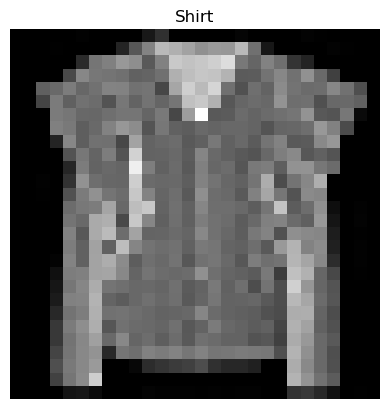

In [8]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")